# Direccion del Codigo / Presentacion

https://bit.ly/2vydbOK



In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from scipy import stats

from sklearn.cluster import KMeans

In [0]:
def simple_wave_plotter(wave_data):
  plt.figure(figsize=(20,5))
  plt.grid()
  plt.plot(np.zeros(wave_data.size), "-b")
  plt.plot(wave_data)
  
  return plt

def simple_fourier_plotter(wave_data):
  plt.figure(figsize=(20,5))
  plt.grid()
  plt.plot(np.zeros(wave_data.size), "-b")
  plt.plot(wave_data, ".r")
  plt.plot(wave_data, "--")
  
  return plt

In [0]:
_base = np.random.rand(100)
_base = _base - 0.5

In [0]:
_base = _base * np.pi * 2
wave_data = np.sin(_base)

In [0]:
# Transformada de Fourier en una Se\~nal Cualquiera

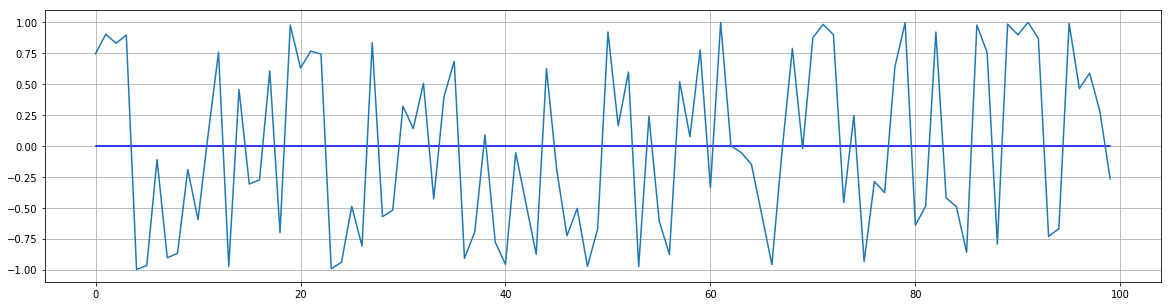

In [150]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(np.zeros(wave_data.size), "-b")
plt.plot(wave_data)

<function matplotlib.pyplot.show>

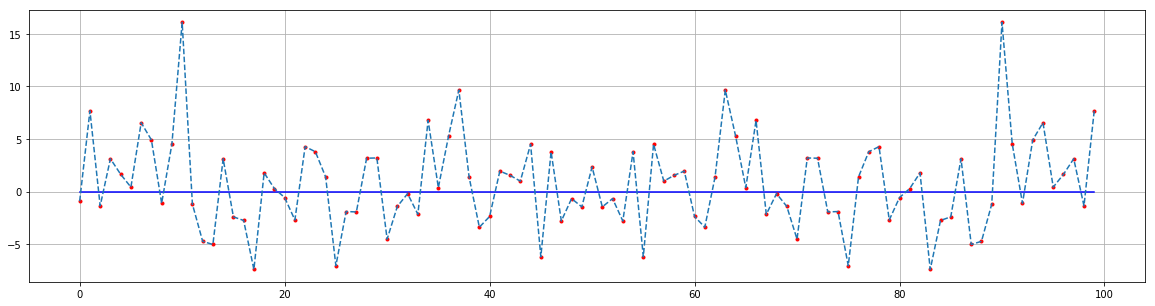

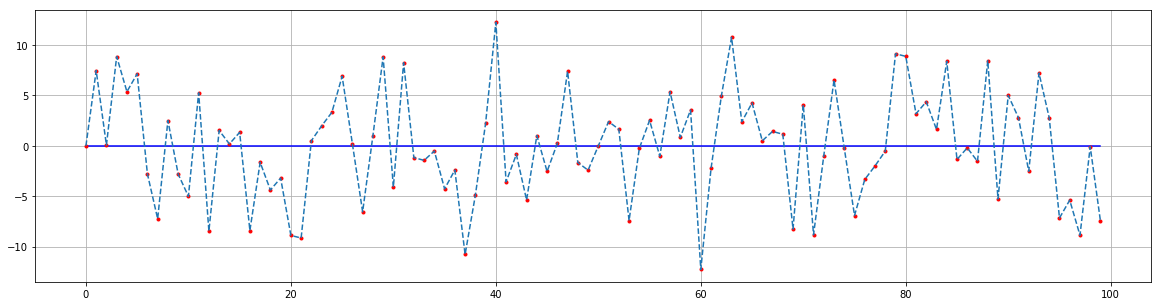

In [151]:
fourier_wave = np.fft.fft(wave_data)

simple_fourier_plotter(fourier_wave.real).show
simple_fourier_plotter(fourier_wave.imag).show

In [0]:
fourier_wave.real

# Se\~nal  Sinusoidal Simple

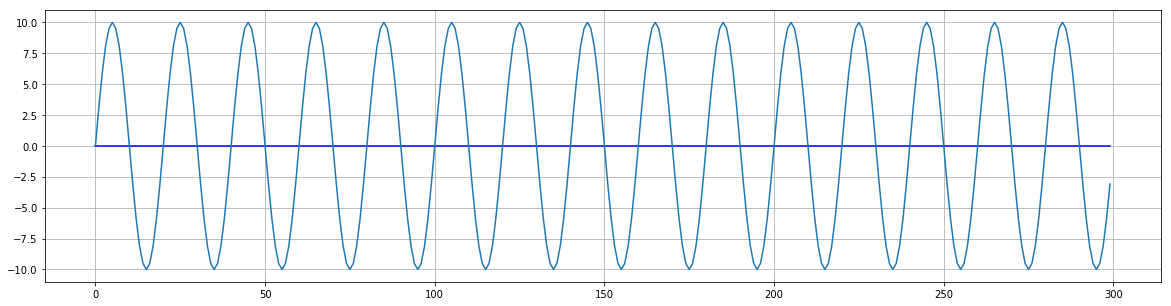

In [196]:
phase = 0
amplitude = 10
frecuency = 5
w_ = 2 * np.pi * frecuency

example_1 = amplitude * np.sin(w_ * np.arange(0,3,0.01))

simple_wave_plotter(example_1).show()

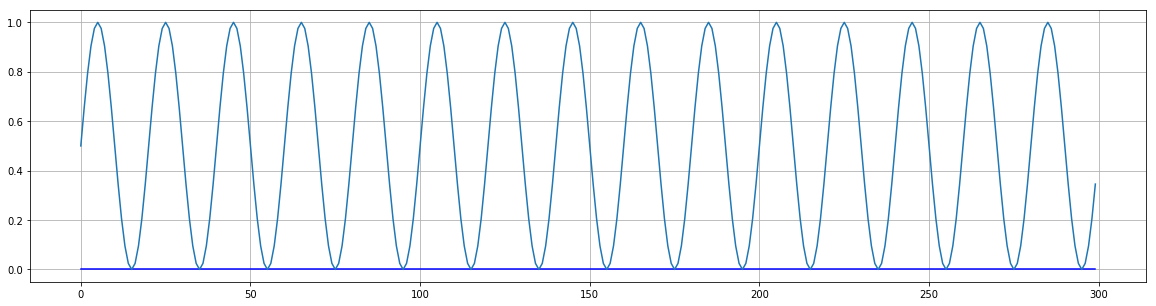

In [197]:
#normalization (pre-fourier)
example_1 = (example_1 - example_1.min())/(example_1.max()-example_1.min())
simple_wave_plotter(example_1).show()

## Aplicando la transformada de Fourier

<function matplotlib.pyplot.show>

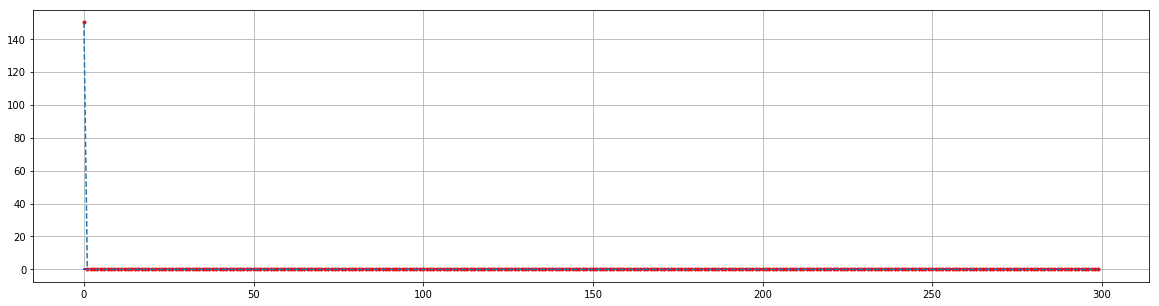

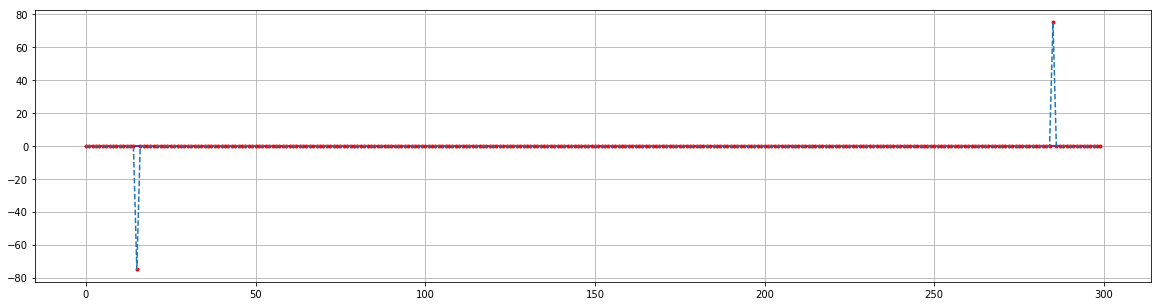

In [198]:
fourier_1 = np.fft.fft(example_1)

simple_fourier_plotter(fourier_1.real).show
simple_fourier_plotter(fourier_1.imag).show

In [199]:
display(stats.describe(fourier_1.real))

DescribeResult(nobs=300, minmax=(-6.050845640172969e-14, 150.0), mean=0.5000000000000001, variance=75.0, skewness=17.23378497259396, kurtosis=295.0033444816053)

In [0]:
fourier_1_real = fourier_1.real[:int(len(fourier_1.real)/2)]

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

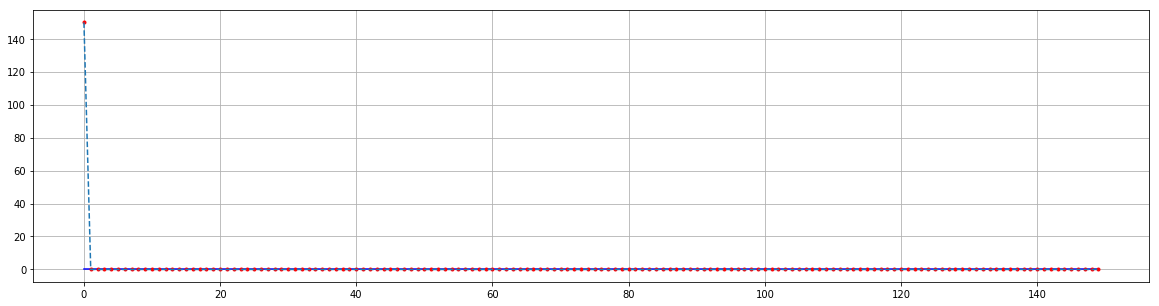

In [201]:
simple_fourier_plotter(fourier_1_real)

In [0]:
fourier_1_df = pd.DataFrame(fourier_1_real)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4bfce5978>]],
      dtype=object)

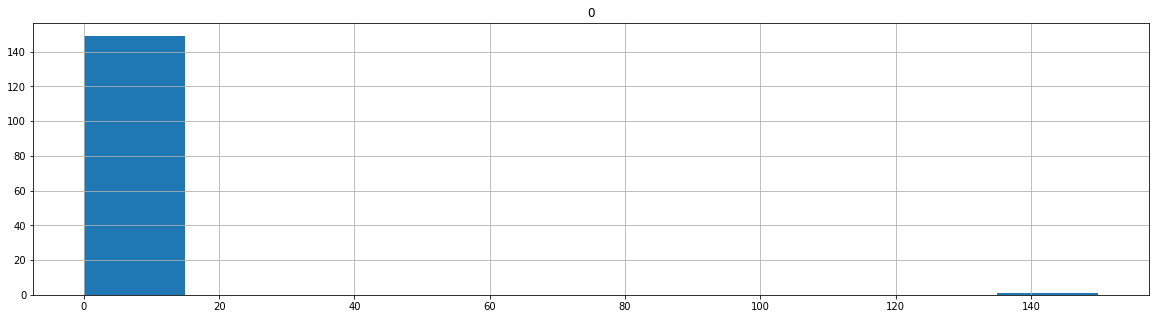

In [203]:
fourier_1_df.hist(figsize=(20,5))

In [0]:
__data = fourier_1_df.mode().values

kmeans = KMeans(n_clusters=3, random_state=0).fit(__data)

In [205]:
np.unique(kmeans.labels_)

array([0, 1, 2], dtype=int32)

In [206]:
kmeans.cluster_centers_

array([[ 2.66453526e-15],
       [ 1.50000000e+02],
       [-3.68594044e-14]])

In [207]:
posible_frecuencies = kmeans.cluster_centers_
posible_frecuencies.max()

150.0

In [208]:
example_1.size

300

In [0]:
example_1.size / posible_frecuencies.max()

# AM

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


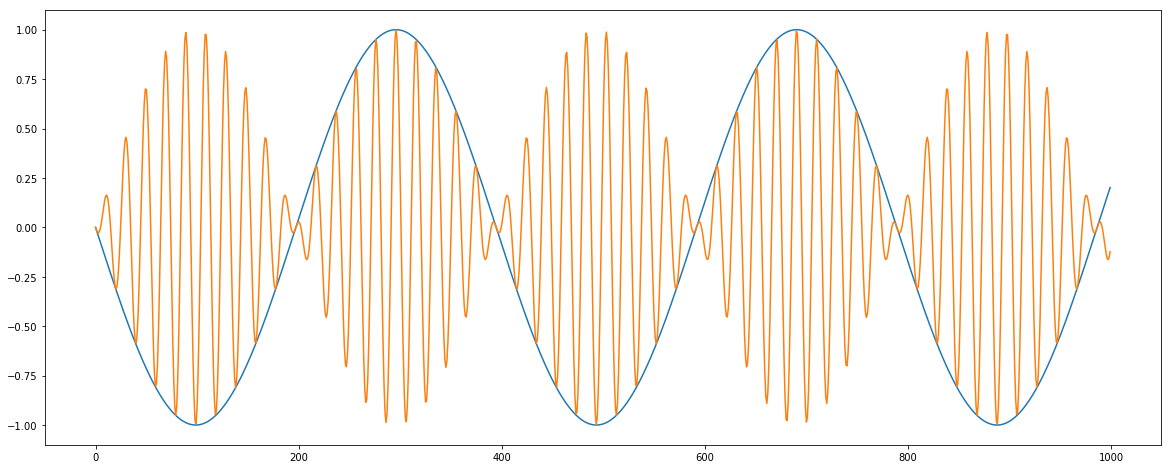

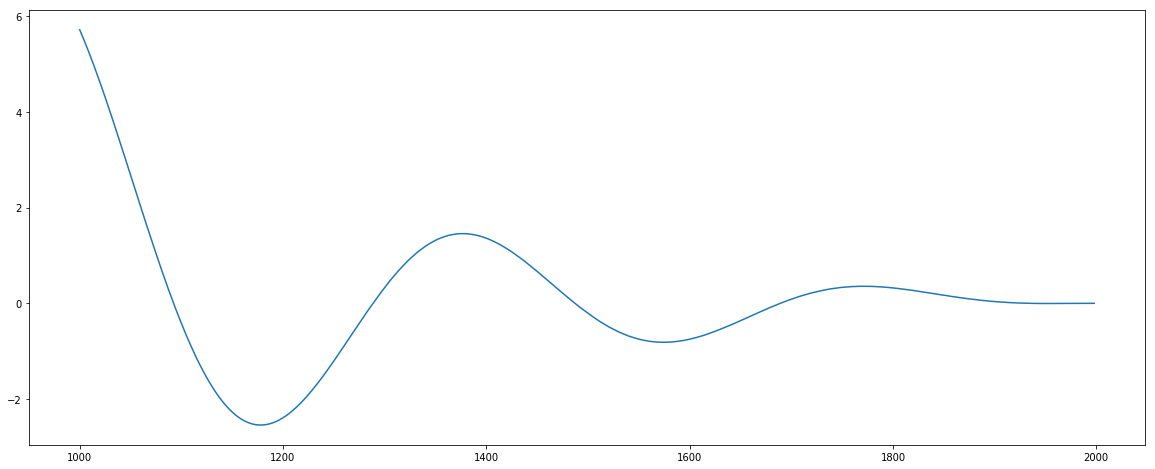

In [133]:
t = np.arange(0, 100, 0.1)

message_freq = 50
message = np.sin(6.28*message_freq*t)
carrier_freq = 1000


class Filters():
    def LowPassFilter(self, cutoff):
        f = np.sin(6.28*cutoff*t)/(3.14*t)
        return f


class AmplitudeModem:
    def modulate(self, message, fc):
        c = np.cos(6.28*fc*t)

        mod = message*c
        return mod

    def demodulate(self, received_array, fc, fm):
        c = np.cos(6.28*fc*t)

        demod = 2*c*received_array
        baseband = demod #- self.modulate(Ac, received_array, 2*fc)
        return np.convolve(Filters().LowPassFilter(message_freq), baseband)

modulated = AmplitudeModem().modulate(message, carrier_freq)
demodulated = AmplitudeModem().demodulate(modulated, carrier_freq, message_freq)

plt.figure(figsize=(20,8))
plt.plot(message)
plt.plot(modulated)
plt.show()

plt.figure(figsize=(20,8))
plt.plot(demodulated)
plt.show()

# FM

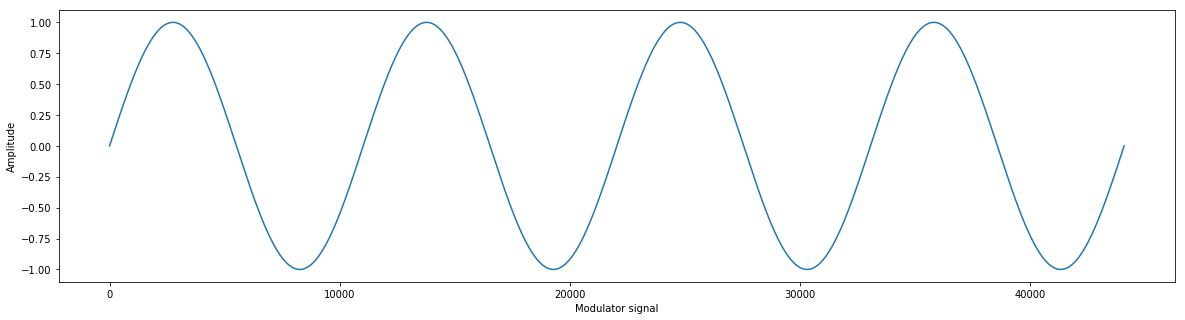

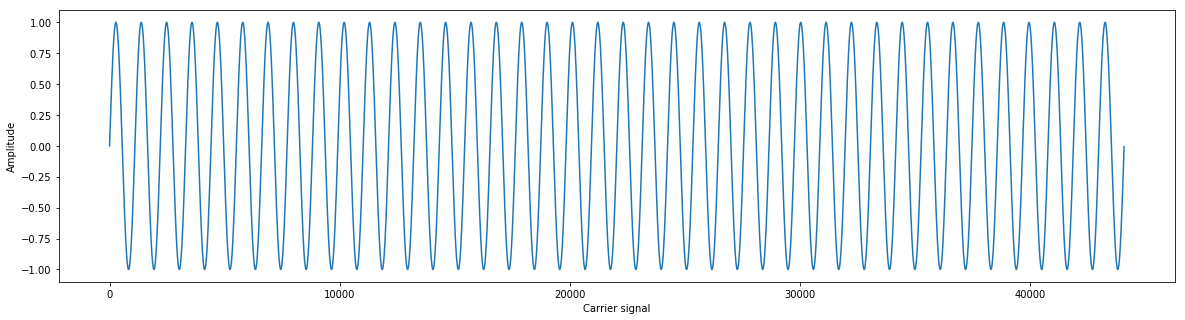

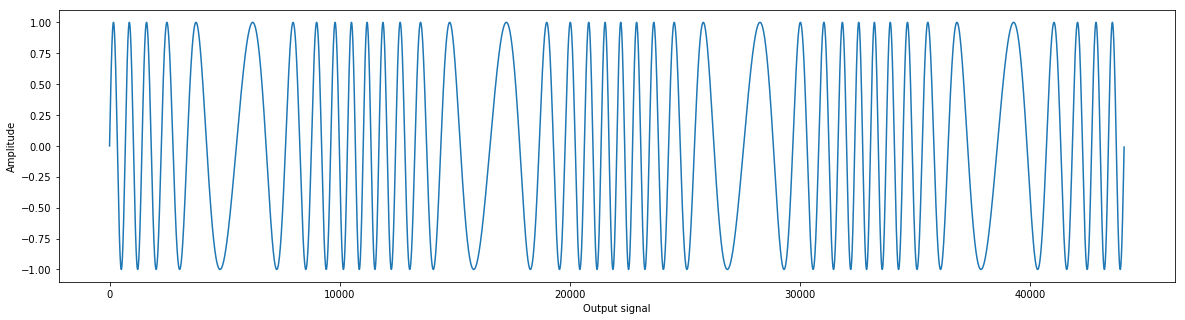

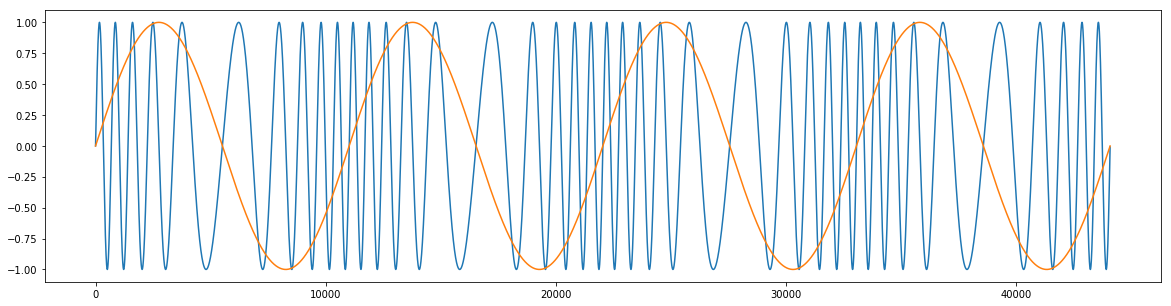

In [137]:
modulator_frequency = 4.0
carrier_frequency = 40.0
modulation_index = 1.0

time = np.arange(44100.0) / 44100.0
modulator = np.sin(2.0 * np.pi * modulator_frequency * time) * modulation_index
carrier = np.sin(2.0 * np.pi * carrier_frequency * time)
product = np.zeros_like(modulator)

for i, t in enumerate(time):
    product[i] = np.sin(2. * np.pi * (carrier_frequency * t + modulator[i]))


plt.figure(figsize=(20,5))
plt.plot(modulator)
plt.ylabel('Amplitude')
plt.xlabel('Modulator signal')
plt.show()

plt.figure(figsize=(20,5))
plt.plot(carrier)
plt.ylabel('Amplitude')
plt.xlabel('Carrier signal')
plt.show()

plt.figure(figsize=(20,5))
plt.plot(product)
plt.ylabel('Amplitude')
plt.xlabel('Output signal')
plt.show()

plt.figure(figsize=(20,5))
plt.plot(product)
plt.plot(modulator)
plt.show()